========PYSPARK========
Number of samples: 10
Estimated value of Pi is 3.6
Absolute error is 0.458407346410207
Time taken is 1.355771541595459 seconds
RAM usage: 6.10%
CPU usage: 12.30%


Number of samples: 1020
Estimated value of Pi is 3.0901960784313727
Absolute error is 0.05139657515842044
Time taken is 0.24427103996276855 seconds
RAM usage: 6.10%
CPU usage: 76.80%


Number of samples: 2030
Estimated value of Pi is 3.154679802955665
Absolute error is 0.013087149365871742
Time taken is 0.2902672290802002 seconds
RAM usage: 6.30%
CPU usage: 80.30%


Number of samples: 3040
Estimated value of Pi is 3.151315789473684
Absolute error is 0.009723135883890954
Time taken is 0.26036548614501953 seconds
RAM usage: 6.40%
CPU usage: 79.70%


Number of samples: 4050
Estimated value of Pi is 3.1476543209876544
Absolute error is 0.006061667397861292
Time taken is 0.26280713081359863 seconds
RAM usage: 6.50%
CPU usage: 83.10%


Number of samples: 5060
Estimated value of Pi is 3.1739130434782608
Abso

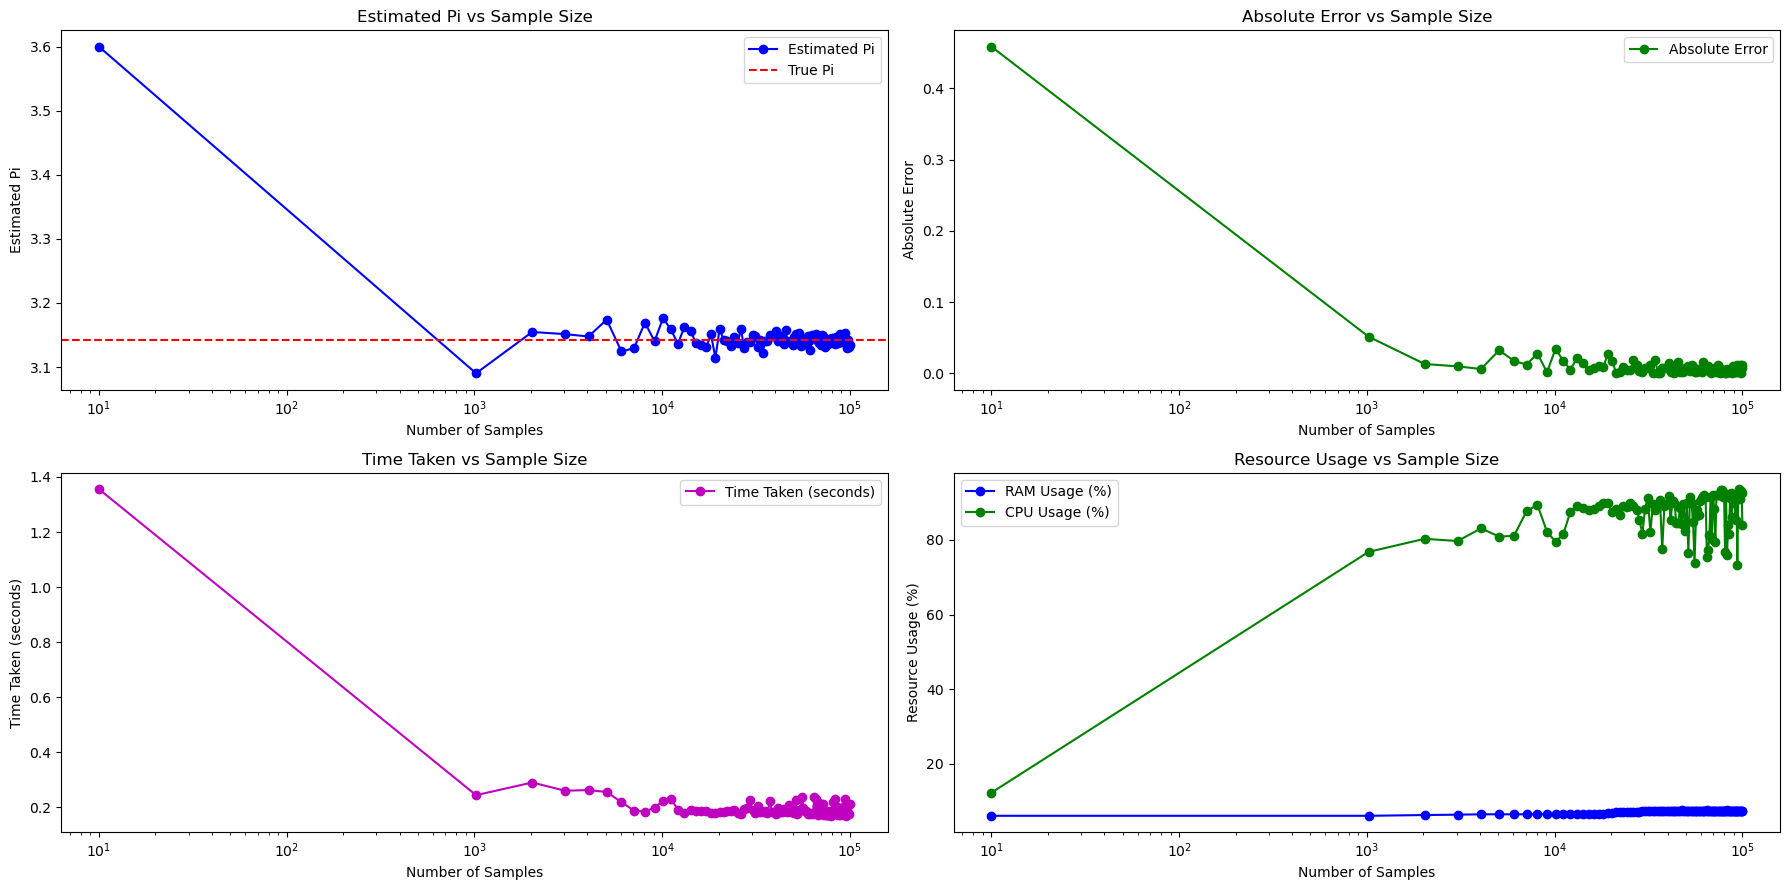

In [1]:
from pyspark import SparkContext, SparkConf
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

def is_point_inside_unit_circle(p):
    x, y = random.random(), random.random()
    return x*x + y*y <= 1

if __name__ == "__main__":
    # Stop any existing SparkContext
    try:
        sc.stop()
    except:
        pass

    # Initialize Spark Context with increased resources
    conf = SparkConf().setAppName("MonteCarloSimulation").set("spark.executor.memory", "4g").set("spark.executor.cores", "2")
    sc = SparkContext(conf=conf)

    # List of different numbers of samples
    sample_sizes = [10,1020,2030,3040,4050,5060,6070,7080,8090,9100,10110,11120,12130,13140,14150,15160,16170,17180,18190,19200,20210,21220,22230,23240,24250,25260,26270,27280,28290,29300,30310,31320,32330,33340,34350,35360,36370,37380,38390,39400,40410,41420,42430,43440,44450,45460,46470,47480,48490,49500,50510,51520,52530,53540,54550,55560,56570,57580,58590,59600,60610,61620,62630,63640,64650,65660,66670,67680,68690,69700,70710,71720,72730,73740,74750,75760,76770,77780,78790,79800,80810,81820,82830,83840,84850,85860,86870,87880,88890,89900,90910,91920,92930,93940,94950,95960,96970,97980,98990,100000]

    # Lists to store results
    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []
    print("========PYSPARK========")
    # Iterate over different sample sizes
    for num_samples in sample_sizes:
        # Start timing
        start_time = time.time()

        # Distribute the samples across the cluster
        samples = sc.parallelize(range(0, num_samples))

        # Perform the Monte Carlo simulation
        count = samples.filter(is_point_inside_unit_circle).count()

        # Estimate Pi
        pi_estimate = 4 * count / num_samples
        pi_estimates.append(pi_estimate)

        # Known value of Pi
        true_pi = math.pi

        # Calculate the absolute error
        absolute_error = abs(pi_estimate - true_pi)
        absolute_errors.append(absolute_error)

        # End timing
        end_time = time.time()

        # Calculate the time taken
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {num_samples}")
        print(f"Estimated value of Pi is {pi_estimate}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Stop the Spark Context
    sc.stop()

    # Plotting results
    plt.figure(figsize=(18, 9))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g',label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m',label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


========DASK========
Number of samples: 10
Estimated value of Pi is 3.6
Absolute error is 0.458407346410207
Time taken is 0.01796865463256836 seconds
RAM usage: 6.90%
CPU usage: 9.70%


Number of samples: 1020
Estimated value of Pi is 3.1254901960784314
Absolute error is 0.016102457511361745
Time taken is 0.03212547302246094 seconds
RAM usage: 6.90%
CPU usage: 31.80%


Number of samples: 2030
Estimated value of Pi is 3.1960591133004925
Absolute error is 0.05446645971069941
Time taken is 0.04849886894226074 seconds
RAM usage: 6.90%
CPU usage: 29.20%


Number of samples: 3040
Estimated value of Pi is 3.1407894736842104
Absolute error is 0.0008031799055827626
Time taken is 0.07396936416625977 seconds
RAM usage: 6.90%
CPU usage: 30.00%


Number of samples: 4050
Estimated value of Pi is 3.122962962962963
Absolute error is 0.018629690626830175
Time taken is 0.08079290390014648 seconds
RAM usage: 6.90%
CPU usage: 30.00%


Number of samples: 5060
Estimated value of Pi is 3.1628458498023715
Abs

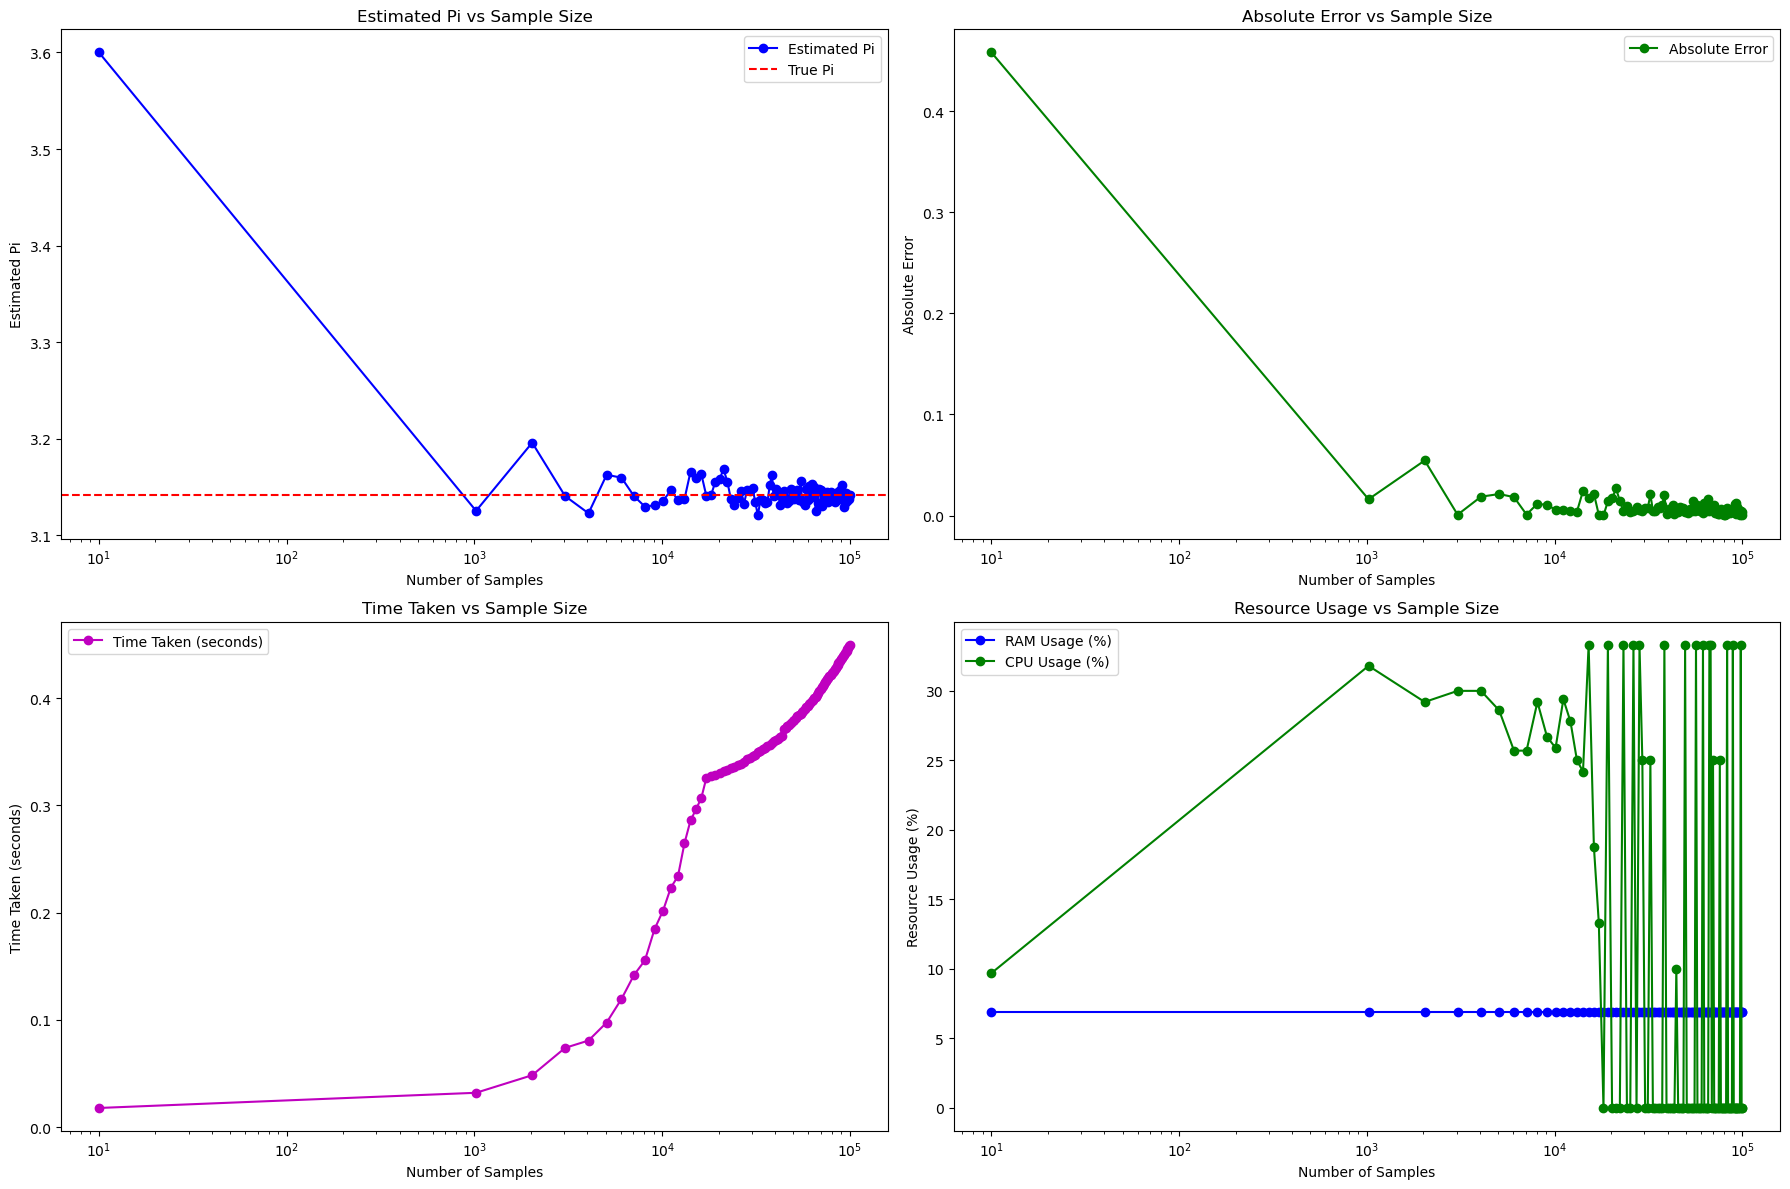

In [2]:
import dask
from dask.distributed import Client, as_completed
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

# Function to perform Monte Carlo simulation to estimate Pi
def monte_carlo_simulation(num_samples):
    def is_point_inside_unit_circle(_):
        x, y = random.random(), random.random()
        return x*x + y*y <= 1
    
    counts = [is_point_inside_unit_circle(_) for _ in range(num_samples)]
    count_inside_circle = sum(counts)
    
    pi_estimate = 4 * count_inside_circle / num_samples
    return pi_estimate

if __name__ == "__main__":
    # Dask Client setup
    client = Client()

    sample_sizes = [10,1020,2030,3040,4050,5060,6070,7080,8090,9100,10110,11120,12130,13140,14150,15160,16170,17180,18190,19200,20210,21220,22230,23240,24250,25260,26270,27280,28290,29300,30310,31320,32330,33340,34350,35360,36370,37380,38390,39400,40410,41420,42430,43440,44450,45460,46470,47480,48490,49500,50510,51520,52530,53540,54550,55560,56570,57580,58590,59600,60610,61620,62630,63640,64650,65660,66670,67680,68690,69700,70710,71720,72730,73740,74750,75760,76770,77780,78790,79800,80810,81820,82830,83840,84850,85860,86870,87880,88890,89900,90910,91920,92930,93940,94950,95960,96970,97980,98990,100000]
    futures = []
    for num_samples in sample_sizes:
        # Scatter the function and arguments to the workers
        future = client.submit(monte_carlo_simulation, num_samples)
        futures.append(future)

    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []

    start_time = time.time()
    print("========DASK========")
    # Retrieve results as they complete
    for i, future in enumerate(as_completed(futures)):
        result = future.result()
        pi_estimates.append(result)

        # Calculate absolute error
        absolute_error = abs(result - math.pi)
        absolute_errors.append(absolute_error)

        # Calculate duration
        end_time = time.time()
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage using psutil
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {sample_sizes[i]}")
        print(f"Estimated value of Pi is {result}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Close the Dask client
    client.close()

    # Plotting results
    plt.figure(figsize=(18, 12))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g', label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m', label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


2024-07-19 15:25:00,657	WARNING services.py:2010 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=9.72gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2024-07-19 15:25:00,791	INFO worker.py:1788 -- Started a local Ray instance.


========RAY========
Number of samples: 10
Estimated value of Pi is 2.8
Absolute error is 0.3415926535897933
Time taken is 0.20856094360351562 seconds
RAM usage: 10.10%
CPU usage: 23.90%


Number of samples: 1020
Estimated value of Pi is 3.145098039215686
Absolute error is 0.003505385625893087
Time taken is 0.3960576057434082 seconds
RAM usage: 10.50%
CPU usage: 66.40%


Number of samples: 2030
Estimated value of Pi is 3.077832512315271
Absolute error is 0.06376014127452212
Time taken is 0.6135632991790771 seconds
RAM usage: 10.50%
CPU usage: 50.90%


Number of samples: 3040
Estimated value of Pi is 3.082894736842105
Absolute error is 0.058697916747687984
Time taken is 0.9456393718719482 seconds
RAM usage: 11.10%
CPU usage: 61.20%


Number of samples: 4050
Estimated value of Pi is 3.1664197530864198
Absolute error is 0.024827099496626648
Time taken is 1.402717113494873 seconds
RAM usage: 11.50%
CPU usage: 60.40%


Number of samples: 5060
Estimated value of Pi is 3.0956521739130434
Absol

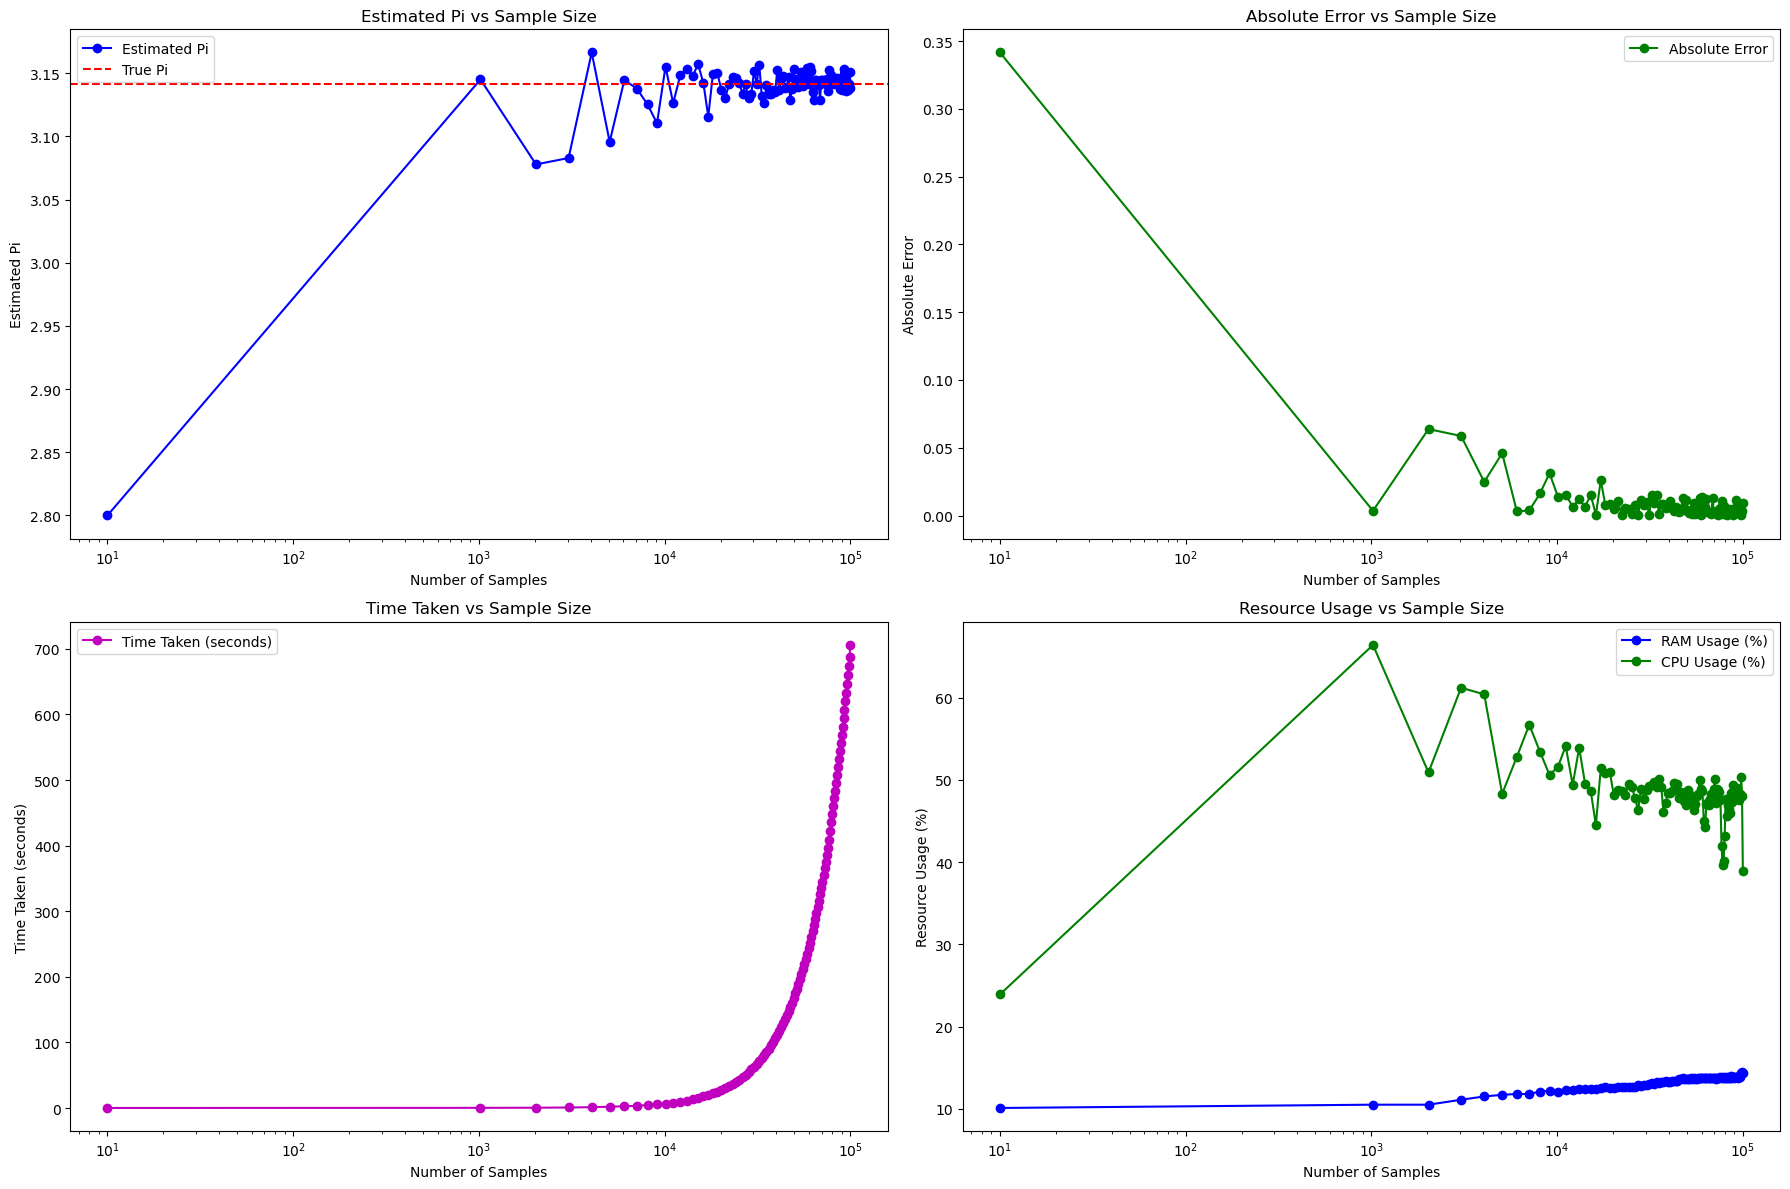

In [3]:
# pip install ray
import ray
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

# Initialize Ray
ray.init()

# Function to check if a point is inside the unit circle
@ray.remote
def is_point_inside_unit_circle():
    x, y = random.random(), random.random()
    return x*x + y*y <= 1

# Function to perform Monte Carlo simulation to estimate Pi
def monte_carlo_simulation(num_samples):
    # Submit tasks to Ray workers
    futures = [is_point_inside_unit_circle.remote() for _ in range(num_samples)]
    
    # Count the number of points inside the circle
    count_inside_circle = sum(ray.get(futures))
    
    # Estimate Pi
    pi_estimate = 4 * count_inside_circle / num_samples
    return pi_estimate

if __name__ == "__main__":
    sample_sizes = [10,1020,2030,3040,4050,5060,6070,7080,8090,9100,10110,11120,12130,13140,14150,15160,16170,17180,18190,19200,20210,21220,22230,23240,24250,25260,26270,27280,28290,29300,30310,31320,32330,33340,34350,35360,36370,37380,38390,39400,40410,41420,42430,43440,44450,45460,46470,47480,48490,49500,50510,51520,52530,53540,54550,55560,56570,57580,58590,59600,60610,61620,62630,63640,64650,65660,66670,67680,68690,69700,70710,71720,72730,73740,74750,75760,76770,77780,78790,79800,80810,81820,82830,83840,84850,85860,86870,87880,88890,89900,90910,91920,92930,93940,94950,95960,96970,97980,98990,100000]

    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []

    start_time = time.time()
    print("========RAY========")
    # Perform Monte Carlo simulation for different sample sizes
    for num_samples in sample_sizes:
        # Execute Monte Carlo simulation using Ray
        result = monte_carlo_simulation(num_samples)
        pi_estimates.append(result)

        # Calculate absolute error
        absolute_error = abs(result - math.pi)
        absolute_errors.append(absolute_error)

        # Calculate duration
        end_time = time.time()
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage using psutil
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {num_samples}")
        print(f"Estimated value of Pi is {result}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Shutdown Ray
    ray.shutdown()

    # Plotting results
    plt.figure(figsize=(18, 12))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g', label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m', label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [4]:
print('over')

over
